### In this notebook you will plot raw data from the PFISR energy inversions using AL index

@author Riley Troyer
science@rileytroyer.com

In [1]:
# Import needed libraries
#import rtroyer_useful_functions as rt_func

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pickle
import pprint
import scipy.stats as stats

In [2]:
# Read in the data file
chemistry_type = 'stanford'
with open(f'../../data/interim/statistics/pa_inversion_results_{chemistry_type}.pickle', 'rb') as handle:
    pa_inversion_results = pickle.load(handle)

### Split data based on delay
This bit is a bit of a mess as far as the code goes. I split based on 4 different delays then go through these manually, so the code is a bit long.
I'll hide/collapse this cell so the notebook looks a little nicer. However, the cell will print out some statistics associated with the bins.

In [3]:
# Loop through each inversion slice and classify based on delay
names = ['0--200', '-200--400', '-400--600', '<-600']
spectrum_data = {names[0] : {},
                 names[1] : {},
                 names[2] : {},
                 names[3] : {},
                }
binary_energy_data = {names[0] : {'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[1] : {'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[2] : {'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}},
                      names[3] : {'low_30keV' : {},
                                  'high_30keV' : {},
                                  'low_50keV' : {},
                                  'high_50keV' : {},
                                  'low_100keV' : {},
                                  'high_100keV' : {},
                                  'total_energy' : {}}
                     }

# Count number of events in each bin
events_000 = []
events_200 = []
events_400 = []
events_600 = []

# Loop through each key and assign to classification
for key in pa_inversion_results.keys():
    
    # Only include good fits
    converged = pa_inversion_results[key]['converged']
    chi2 = pa_inversion_results[key]['chi2']
    reduced_chi2 = chi2/pa_inversion_results[key]['dof']
    
    # If fit didn't converge, skip
    if converged == False:
        continue
    
    # If chi2 not in reasonable bounds skip
    if (reduced_chi2 < 0) or (reduced_chi2 > 3):
        continue
        
    # Also make sure time is defined
    if np.isnan(pa_inversion_results[key]['ae_index']):
        continue
    
    # Get data
    
    # Number flux needs to be multiplied by energy bin width
    energy_bins = pa_inversion_results[key]['energy_bins']
    bin_widths = energy_bins - np.roll(energy_bins, shift=1)
    #...fix first value
    bin_widths[0] = energy_bins[0] - 0
    
    num_flux = pa_inversion_results[key]['modeled_flux']*bin_widths
    
    al_index = pa_inversion_results[key]['al_index']
    mlt = key#pa_inversion_results[key]['mlt_time']
    high_energy_30 = pa_inversion_results[key]['high_30keV']
    low_energy_30 = pa_inversion_results[key]['low_30keV']
    high_energy_50 = pa_inversion_results[key]['high_50keV']
    low_energy_50 = pa_inversion_results[key]['low_50keV']
    high_energy_100 = pa_inversion_results[key]['high_100keV']
    low_energy_100 = pa_inversion_results[key]['low_100keV']
    total_energy = pa_inversion_results[key]['total_energy']

    
    if al_index >= -200:
        n = 0
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_000.append(pa_inversion_results[key]['pa_event'])
    
    elif (al_index < -200) and (al_index >= -400):
        n = 1
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_200.append(pa_inversion_results[key]['pa_event'])
        
    elif (al_index < -400) and (al_index >= -600):
        n = 2
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_400.append(pa_inversion_results[key]['pa_event'])
        
    elif al_index < -600:
        n = 3
        spectrum_data[names[n]][mlt] = num_flux
        
        binary_energy_data[names[n]]['high_30keV'][mlt] = high_energy_30
        binary_energy_data[names[n]]['low_30keV'][mlt] = low_energy_30
        binary_energy_data[names[n]]['high_50keV'][mlt] = high_energy_50
        binary_energy_data[names[n]]['low_50keV'][mlt] = low_energy_50
        binary_energy_data[names[n]]['high_100keV'][mlt] = high_energy_100
        binary_energy_data[names[n]]['low_100keV'][mlt] = low_energy_100
        binary_energy_data[names[n]]['total_energy'][mlt] = total_energy
        
        events_600.append(pa_inversion_results[key]['pa_event'])
        
print('0--200 AL:', len(spectrum_data[names[0]].keys()))
print('Events: ', len(np.unique(events_000)))
print('-200--400 AL:', len(spectrum_data[names[1]].keys()))
print('Events: ', len(np.unique(events_200)))
print('-400--600 AL:', len(spectrum_data[names[2]].keys()))
print('Events: ', len(np.unique(events_400)))
print('<-600 AL:', len(spectrum_data[names[3]].keys()))
print('Events: ', len(np.unique(events_600)))

# Average energy spectra for 0-20min
#...set anything <=0 to 1
#...use geometric mean to better account for large values
substorm_data = np.array(list(spectrum_data[names[0]].values()))
substorm_data[substorm_data <= 0] = 1
substorm_spectrum = stats.mstats.gmean(substorm_data, axis=0)
substorm_std = np.nanstd(substorm_data, axis=0)

# 20-40min
kinda_substorm_data1 = np.array(list(spectrum_data[names[1]].values()))
kinda_substorm_data1[kinda_substorm_data1 <= 0] = 1
kinda_substorm_spectrum1 = stats.mstats.gmean(kinda_substorm_data1,
                                              axis=0)
kinda_substorm_std1 = np.nanstd(kinda_substorm_data1, axis=0)

# 40-60min
kinda_substorm_data2 = np.array(list(spectrum_data[names[2]].values()))
kinda_substorm_data2[kinda_substorm_data2 <= 0] = 1
kinda_substorm_spectrum2 = stats.mstats.gmean(kinda_substorm_data2,
                                              axis=0)
kinda_substorm_std2 = np.nanstd(kinda_substorm_data2, axis=0)

# Non substorm
non_substorm_data = np.array(list(spectrum_data[names[3]].values()))
non_substorm_data[non_substorm_data <= 0] = 1
non_substorm_spectrum = stats.mstats.gmean(non_substorm_data, axis=0)
non_substorm_std = np.nanstd(non_substorm_data, axis=0)

0--200 AL: 1437
Events:  30
-200--400 AL: 787
Events:  30
-400--600 AL: 459
Events:  11
<-600 AL: 140
Events:  3


### Now I limit to just one energy threshold, for the paper it was 30 keV

### Get average low and high energy contributions for each temporal bin, plot this data on a bar graph

In [4]:
# Loop through temporal bins and get low and high energy averages
#...use median to filter out errant high values

# Specify which energy
energy_threshold = '30keV'
#energy_threshold = '50keV'
#energy_threshold = '100keV'

# Dictionary to store all plotting data
al_plotting_data = {names[0] : {},
                    names[1] : {},
                    names[2] : {},
                    names[3] : {}
                   }

for key in binary_energy_data:
    
    # High energies
    high_energies = list(binary_energy_data[key]['high_'+energy_threshold]
                         .values())
    high_energies = np.absolute(np.array(high_energies))
    high_energy_avg = stats.mstats.gmean(high_energies)
    high_energy_std = np.nanstd(high_energies)
    
    # Low energies
    low_energies = list(binary_energy_data[key]['low_'+energy_threshold]
                         .values())
    low_energies = np.array(low_energies)
    low_energy_avg = stats.mstats.gmean(low_energies)
    low_energy_std = np.nanstd(low_energies)
    
    # Total energy
    total_energies = list(binary_energy_data[key]['total_energy']
                          .values())
    total_energies = np.array(total_energies)
    total_energy_avg = stats.mstats.gmean(total_energies)

    # Write to dictionary
    al_plotting_data[key] = {'high' : high_energy_avg/1e15,
                             'high-std' : high_energy_std/1e15,
                             'low' : low_energy_avg/1e15,
                             'low-std' : low_energy_std/1e15,
                             'total_energy' : total_energy_avg/1e15
                            }

# Print the data
pp = pprint.PrettyPrinter(depth=2)
pp.pprint(al_plotting_data)

{'-200--400': {'high': 1.2788099838311084,
               'high-std': 9.110644022373434,
               'low': 4.586186250006099,
               'low-std': 5.486273835674372,
               'total_energy': 7.005145740066583},
 '-400--600': {'high': 6.058045854730307,
               'high-std': 11.244011831134985,
               'low': 4.528915317807671,
               'low-std': 3.3519478590041096,
               'total_energy': 12.257724571815086},
 '0--200': {'high': 0.3945972063089688,
            'high-std': 3.947901756547012,
            'low': 2.9443978529855146,
            'low-std': 5.897640113214787,
            'total_energy': 3.8708366666473273},
 '<-600': {'high': 7.496794325823435,
           'high-std': 14.863306703270018,
           'low': 5.98591376964508,
           'low-std': 5.998134446217069,
           'total_energy': 16.27193950859607}}


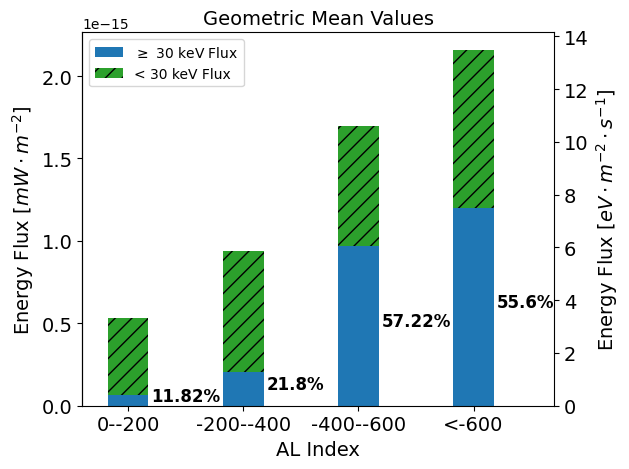

In [5]:
# Plot data as stacked bar chart

# High and low energy values and errors
high_values = [al_plotting_data[names[i]]['high'] for i in [0, 1, 2, 3]]
high_values_std = [al_plotting_data[names[i]]['high-std'] 
                   for i in [0, 1, 2, 3]]
low_values = [al_plotting_data[names[i]]['low'] for i in [0, 1, 2, 3]]
low_values_std = [al_plotting_data[names[i]]['low-std'] 
                   for i in [0, 1, 2, 3]]

# Normalize values
norm_high_values = [high_values[i]/(high_values[i] + low_values[i])
                    for i in [0, 1, 2, 3]]
norm_low_values = [low_values[i]/(high_values[i] + low_values[i])
                    for i in [0, 1, 2, 3]]

fig, ax = plt.subplots()

ax.bar(names, high_values, width=0.35, #yerr=high_values_std,
       capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
ax.bar(names, low_values, width=0.35, #yerr=low_values_std,
       bottom=high_values, hatch='//',
       capsize=5, color='C2', label='< 30 keV Flux')

# Edit titles and labels
ax.set_title('Geometric Mean Values', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.set_xlabel('AL Index',
              fontsize = 14)
ax.set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

ax.set_xlim(-0.4, 3.7)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
#ax.set_yscale('log')

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16
secax = ax.secondary_yaxis('left', functions=(eV2mJ, mJ2eV))
secax.set_ylabel(r'Energy Flux ${\left[mW \cdot m^{-2}'
                 r'\right]}$', fontsize = 14)
secax.tick_params(axis='y', which='major', labelsize=14)

# Add text for percentages
def plot_perc(n):
    high = round(norm_high_values[n]*100, 2)
    low = 100 - high
    ax.text(n + 0.2, high_values[n] - high_values[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')
#     ax.text(n + 0.2, high_values[n] + high_values[n]*(0.3 + n/10),
#             str(low) + '%', fontsize = 12, fontweight = 'bold')
    
for n in [0, 1, 2, 3]:
    plot_perc(n)
    
ax.legend(loc='upper left')

plt.tight_layout()